# SHRESTHA MADAN 
# MAC 270 FINAL PROJECT


Dataset for blackfriday : 
I want to explor the purchasing power during a Black Friday shopping spree. We are going to use features such as age, city, occupation, gender, and category of items purchased.
we will explore the correlation between different features.


GOAL: to estimate the amount a buyer is spending during that one day of the year which black friday.
GOAL: to explore statistical information, clean up the dataset, and attempt to choose best regression model to test it against ones.


USES:  a retail stores that wishes to understand the demographics or items they ought to invest in for future events.


In [1]:
# for numerical computing
import numpy as np

# for dataframes
import pandas as pd

# for easier visualization
import seaborn as sns

# for visualization and to display plots
from matplotlib import pyplot as plt
%matplotlib inline

# import color maps
from matplotlib.colors import ListedColormap

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

from math import sqrt

# to split train and test set
from sklearn.model_selection import train_test_split

# to perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import Ridge  # Linear Regression + L2 regularization
from sklearn.linear_model import Lasso  # Linear Regression + L1 regularization
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as rs
from sklearn.metrics import mean_absolute_error as mae

#import xgboost
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-7.2.0-posix-seh-rt_v5-rev0\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to save the final model on disk
from sklearn.externals import joblib


In [2]:
np.set_printoptions(precision=2, suppress=True) #for printing floating point numbers upto  precision 2

In [3]:
df= pd.read_csv('BlackFriday.csv')

In [4]:
df.shape

(537577, 12)

In [5]:
# This dataset 
#Contains 537,577 entries (or rows)
# 12 total columns, 9 of which will be considered as features

# Columns of the dataset

In [6]:
df.columns # Displaying columns of dataset

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
df.head() # shows first 5 rows

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# BAR PLOTS

FileNotFoundError: [Errno 2] No such file or directory: './PLOT/all_feature.png'

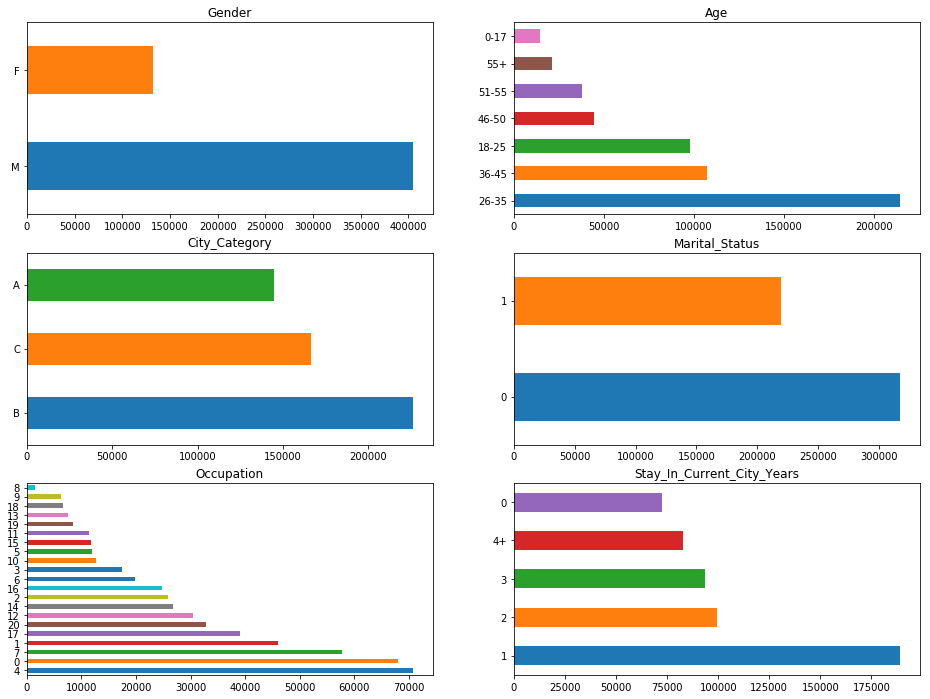

In [10]:
ig, axes = plt.subplots(nrows=3, ncols=2, figsize=[16, 12])

df['Gender'].value_counts().plot(kind='barh', ax=axes[0,0], title='Gender')
df['Age'].value_counts().plot(kind='barh', ax=axes[0,1], title='Age')
df['City_Category'].value_counts().plot(kind='barh', ax=axes[1,0], title='City_Category')
df['Marital_Status'].value_counts().plot(kind='barh', ax=axes[1,1], title='Marital_Status')
df['Occupation'].value_counts().plot(kind='barh', ax=axes[2,0], title='Occupation')
df['Stay_In_Current_City_Years'].value_counts().plot(kind='barh', ax=axes[2,1], title='Stay_In_Current_City_Years')
plt.savefig("./PLOT/all_feature.png")
plt.show()

# Some feaures are numeric and some are categorical
# Filtering the categorical features:

In [ ]:
df.dtypes[df.dtypes=='object']

# Distributions of numeric features

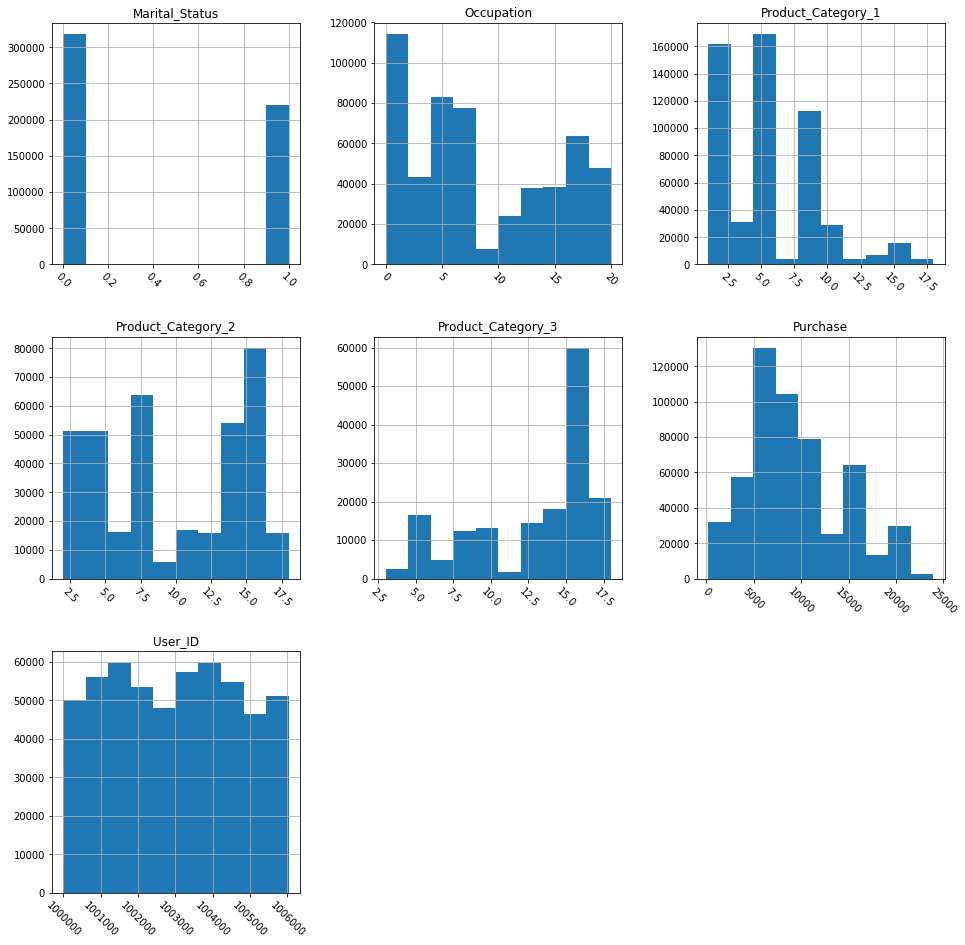

In [11]:
# Plot histogram grid
df.hist(figsize=(16,16), xrot=-45) ## Display the labels rotated by 45 degress

# Clear the text "residue"
plt.show()

# Display summary statistics for the numerical features.

In [12]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


# Obeservation:

Look at the 'Purchase' column, we can see that its max value is 23961.
Its standard deviation is 4981, while its min is 185 and mean is 9333. 

# categorical features distribution

In [13]:
#Let's Display summary statistics.

In [14]:
df.describe(include=['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577,537577
unique,3623,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1858,405380,214690,226493,189192


In [15]:
from sklearn.preprocessing import LabelEncoder

# using numerical results for correlation matrix
st = df.apply(LabelEncoder().fit_transform)

# the corr() method automatically ignores null values 
st.corr(method = 'spearman').style.background_gradient(cmap = 'GnBu').set_precision(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1,-0.016,-0.031,0.046,-0.021,0.026,-0.03,0.019,0.0024,0.0014,-0.026,0.0043
Product_ID,-0.016,1,0.018,0.022,0.0081,0.00085,-0.0018,0.011,0.0098,0.1,0.12,-0.081
Gender,-0.031,0.018,1,-0.0058,0.12,-0.004,0.014,-0.01,-0.063,-0.012,-0.024,0.054
Age,0.046,0.022,-0.0058,1,0.093,0.11,-0.0023,0.31,0.063,0.036,0.02,0.022
Occupation,-0.021,0.0081,0.12,0.093,1,0.037,0.03,0.017,-0.016,-0.0076,-0.0064,0.023
City_Category,0.026,0.00085,-0.004,0.11,0.037,1,0.021,0.04,-0.032,-0.033,-0.034,0.069
Stay_In_Current_City_Years,-0.03,-0.0018,0.014,-0.0023,0.03,0.021,1,-0.013,-0.0058,-0.0043,-0.00087,0.006
Marital_Status,0.019,0.011,-0.01,0.31,0.017,0.04,-0.013,1,0.021,0.014,0.011,0.0018
Product_Category_1,0.0024,0.0098,-0.063,0.063,-0.016,-0.032,-0.0058,0.021,1,0.58,0.41,-0.37
Product_Category_2,0.0014,0.1,-0.012,0.036,-0.0076,-0.033,-0.0043,0.014,0.58,1,0.53,-0.27


# Observation from above correlation table

We notice that the highest correlations occur between the product categories and the purchase price which we are trying to predict.

Let's explore the data some more and look at different distributions.



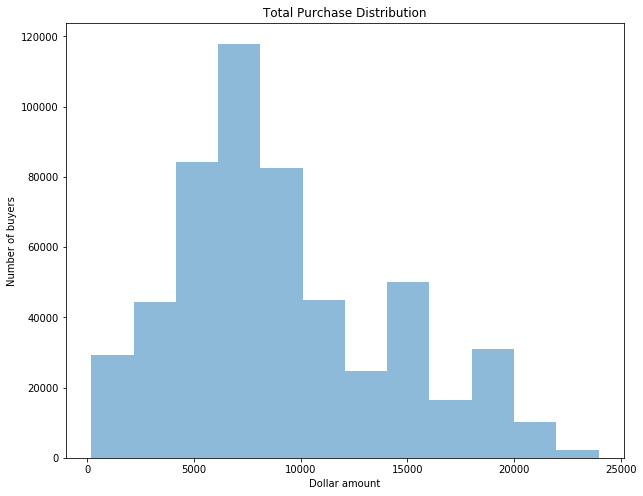

In [16]:
plt.figure(figsize=(10,8))
df['Purchase'].plot.hist(bins=12, alpha=0.5);
plt.xlabel('Dollar amount');
plt.ylabel('Number of buyers');
plt.title('Total Purchase Distribution');
plt.show()

In [17]:
# the large amount of customers are willing to spend around 7.5k in average on Black Friday.

Now we are going to plot the bargraph and pie chart for different occupations and the count for people

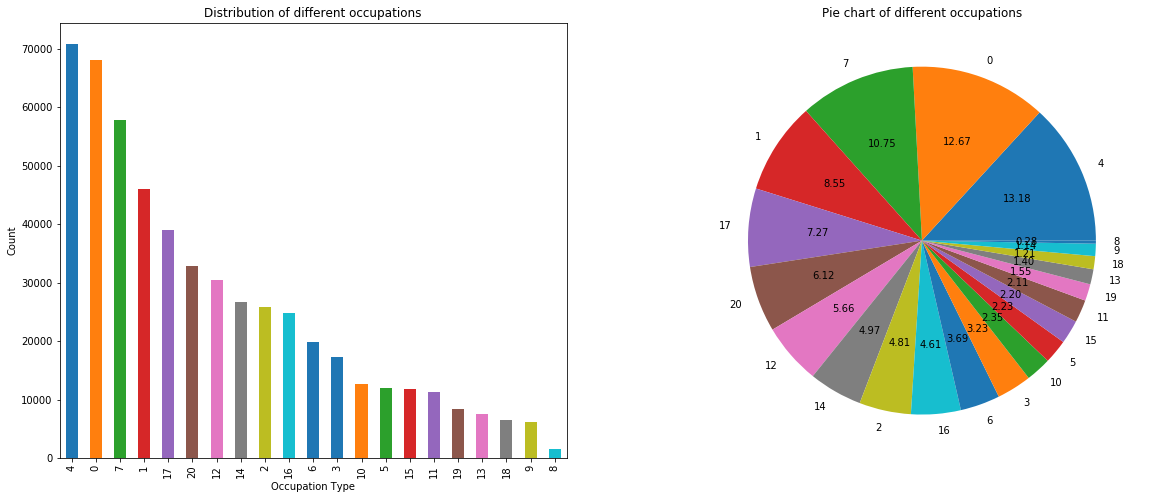

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(121)
pd.value_counts(df['Occupation']).plot.bar();
plt.xlabel('Occupation Type');
plt.ylabel('Count');
plt.title('Distribution of different occupations')

plt.subplot(122)
pd.value_counts(df['Occupation']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of different occupations')
plt.show()

# OBSERVSTION: we notice that certain occupation have more purchasing power than rest.

# Distribution of city categories of buyers

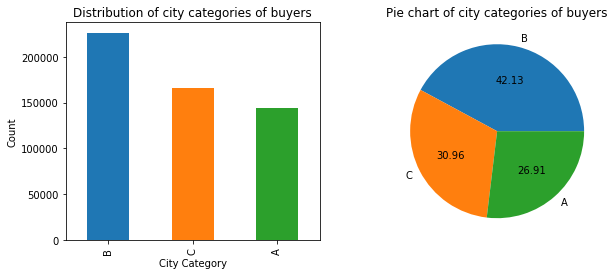

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['City_Category']).plot.bar();
plt.xlabel('City Category');
plt.ylabel('Count');
plt.title('Distribution of city categories of buyers')

plt.subplot(122)
pd.value_counts(df['City_Category']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of city categories of buyers')
plt.show()

# OBSERVATION: City category B has the highest number of buyers on a Black Friday

# Distribution of gender of buyers

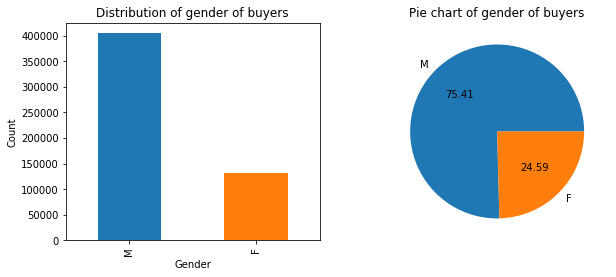

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Gender']).plot.bar();
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Distribution of gender of buyers')

plt.subplot(122)
pd.value_counts(df['Gender']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of gender of buyers')
plt.show()

# OBSERVATION: It appears that there are more male buyers on Black Friday

# Distrubution of age groups of buyers

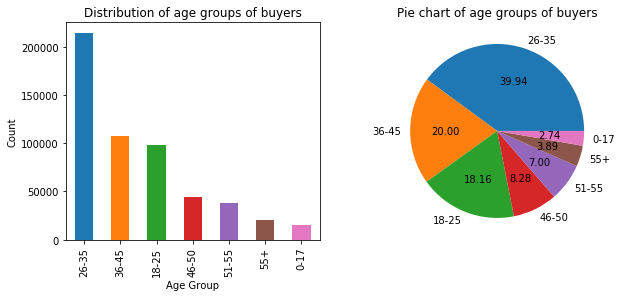

In [21]:
plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Age']).plot.bar();
plt.xlabel('Age Group');
plt.ylabel('Count');
plt.title('Distribution of age groups of buyers')

plt.subplot(122)
pd.value_counts(df['Age']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of age groups of buyers')
plt.show()

# OBSERVATION: The majority of buyers are between the ages of 26-35 and goes down per age group



In [22]:
# BOXPLOT graphing

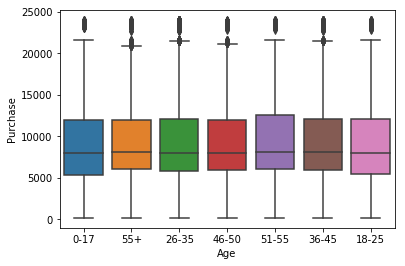

In [23]:
sns.boxplot('Age','Purchase', data = df)
plt.show()

# Distribution of Marital Status of buyers 

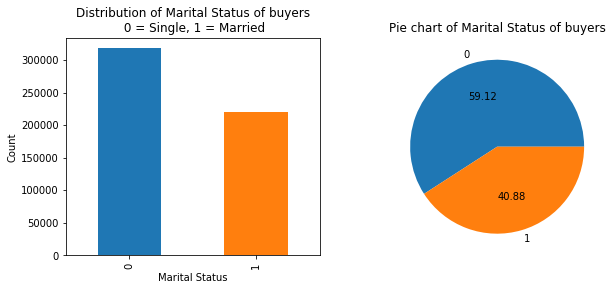

In [24]:

plt.figure(figsize=(10,4))

plt.subplot(121)
pd.value_counts(df['Marital_Status']).plot.bar();
plt.xlabel('Marital Status');
plt.ylabel('Count');
plt.title('Distribution of Marital Status of buyers\n 0 = Single, 1 = Married')

plt.subplot(122)
pd.value_counts(df['Marital_Status']).plot.pie(autopct='%.2f');
plt.xlabel('');
plt.ylabel('');
plt.title('Pie chart of Marital Status of buyers')
plt.show()

# OIBSERVATION:  Singles form a slightly larger majority of the buyers

# Data Cleaning

In [25]:
# We will clean up the dataset by removing unnecessary columns and dealing with missing values.

In [26]:
# these columns are unnecessary for my regression analysis

df = df.drop(columns = ['User_ID', 'Product_ID'])

# Check for missing values

In [27]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


# Since both of these columns contain numerical data, I will use Imputer on both of them to replace missing values with the mean value for each column

In [28]:
from sklearn.preprocessing import Imputer

df[['Product_Category_2', 'Product_Category_3']] = Imputer(strategy='mean').fit_transform(df[['Product_Category_2', 'Product_Category_3']]
)

df[['Product_Category_2', 'Product_Category_3']].head()

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,Product_Category_2,Product_Category_3
0,9.842144,12.66984
1,6.000000,14.00000
2,9.842144,12.66984
3,14.000000,12.66984
4,9.842144,12.66984


In [29]:
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/df.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


In [30]:
# There is no more missing values

# Now let's convert strings into numerical fields

In [31]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

# Using get_dummies we can convert str fields into float or int

In [32]:
# first convert these int columns to float before using get_dummies to prevent it from transforming them
cols = ['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']
df[cols] = df[cols].astype(float)


# apply get_dummies
df = pd.get_dummies(df)

df.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,10.0,0.0,3.0,9.842144,12.66984,8370.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
1,10.0,0.0,1.0,6.000000,14.00000,15200.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,10.0,0.0,12.0,9.842144,12.66984,1422.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,10.0,0.0,12.0,14.000000,12.66984,1057.0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4,16.0,0.0,8.0,9.842144,12.66984,7969.0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


In [33]:
df.dtypes

Occupation                       float64
Marital_Status                   float64
Product_Category_1               float64
Product_Category_2               float64
Product_Category_3               float64
Purchase                         float64
Gender_F                           uint8
Gender_M                           uint8
Age_0-17                           uint8
Age_18-25                          uint8
Age_26-35                          uint8
Age_36-45                          uint8
Age_46-50                          uint8
Age_51-55                          uint8
Age_55+                            uint8
City_Category_A                    uint8
City_Category_B                    uint8
City_Category_C                    uint8
Stay_In_Current_City_Years_0       uint8
Stay_In_Current_City_Years_1       uint8
Stay_In_Current_City_Years_2       uint8
Stay_In_Current_City_Years_3       uint8
Stay_In_Current_City_Years_4+      uint8
dtype: object

In [34]:
# Now we can see we changed the categories to float and we have everything in numerical values


In [35]:
# Create separate object for target variable
y = df.Purchase
# Create separate object for input features
X = df.drop('Purchase', axis=1)

In [36]:
# Split X and y into train and test sets: 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(430061, 22) (107516, 22) (430061,) (107516,)


In [38]:
train_mean = X_train.mean()
train_std = X_train.std()

In [39]:
X_train = (X_train - train_mean) / train_std

In [40]:
X_train.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,...,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05,4.300610e+05
mean,-1.303425e-15,1.139689e-14,-2.232773e-16,-3.283098e-13,8.695299e-12,1.978527e-15,-1.978527e-15,4.337284e-15,-1.367326e-15,-1.911947e-15,...,-4.183229e-15,4.399976e-15,1.504670e-15,-3.313282e-16,3.249014e-15,-1.212188e-15,2.134079e-15,-2.937911e-15,6.036452e-15,-1.055128e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.239073e+00,-8.305494e-01,-1.146040e+00,-1.859014e+00,-4.242630e+00,-5.717209e-01,-1.749101e+00,-1.677299e-01,-4.714522e-01,-8.149247e-01,...,-2.737076e-01,-2.016176e-01,-6.069022e-01,-8.528494e-01,-6.698680e-01,-3.952042e-01,-7.368110e-01,-4.766612e-01,-4.589415e-01,-4.265257e-01
25%,-9.323963e-01,-8.305494e-01,-1.146040e+00,-4.380043e-01,-1.084959e-03,-5.717209e-01,5.717209e-01,-1.677299e-01,-4.714522e-01,-8.149247e-01,...,-2.737076e-01,-2.016176e-01,-6.069022e-01,-8.528494e-01,-6.698680e-01,-3.952042e-01,-7.368110e-01,-4.766612e-01,-4.589415e-01,-4.265257e-01
50%,-1.657057e-01,-8.305494e-01,-7.924827e-02,-1.720344e-03,-1.084959e-03,-5.717209e-01,5.717209e-01,-1.677299e-01,-4.714522e-01,-8.149247e-01,...,-2.737076e-01,-2.016176e-01,-6.069022e-01,-8.528494e-01,-6.698680e-01,-3.952042e-01,-7.368110e-01,-4.766612e-01,-4.589415e-01,-4.265257e-01
75%,9.076610e-01,1.204020e+00,7.208454e-01,9.830049e-01,-1.084959e-03,-5.717209e-01,5.717209e-01,-1.677299e-01,-4.714522e-01,1.227104e+00,...,-2.737076e-01,-2.016176e-01,1.647708e+00,1.172537e+00,1.492828e+00,-3.952042e-01,1.357197e+00,-4.766612e-01,-4.589415e-01,-4.265257e-01
max,1.827690e+00,1.204020e+00,3.387824e+00,1.930344e+00,2.336918e+00,1.749101e+00,5.717209e-01,5.961952e+00,2.121101e+00,1.227104e+00,...,3.653526e+00,4.959873e+00,1.647708e+00,1.172537e+00,1.492828e+00,2.530331e+00,1.357197e+00,2.097921e+00,2.178922e+00,2.344519e+00


In [41]:
## Note: We use train_mean and train_std_dev to standardize test data set
X_test = (X_test - train_mean) / train_std

In [42]:
## Check for mean and std dev. - not exactly 0 and 1
X_test.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,...,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
count,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,...,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000,107516.000000
mean,0.001575,0.005884,-0.002133,-0.008602,-0.005425,-0.005007,0.005007,-0.000172,-0.002981,0.002962,...,0.005541,-0.004598,-0.001435,0.002452,-0.001242,0.002854,0.000715,-0.001644,-0.005321,0.003708
std,1.001983,1.001084,1.001522,1.001775,1.000313,0.997039,0.997039,0.999504,0.997537,1.000609,...,1.009309,0.988993,0.999255,1.000392,0.999492,1.003042,1.000225,0.998669,0.995403,1.003547
min,-1.239073,-0.830549,-1.146040,-1.859014,-4.242630,-0.571721,-1.749101,-0.167730,-0.471452,-0.814925,...,-0.273708,-0.201618,-0.606902,-0.852849,-0.669868,-0.395204,-0.736811,-0.476661,-0.458942,-0.426526
25%,-0.932396,-0.830549,-1.146040,-0.438004,-0.001085,-0.571721,0.571721,-0.167730,-0.471452,-0.814925,...,-0.273708,-0.201618,-0.606902,-0.852849,-0.669868,-0.395204,-0.736811,-0.476661,-0.458942,-0.426526
50%,-0.165706,-0.830549,-0.079248,-0.001720,-0.001085,-0.571721,0.571721,-0.167730,-0.471452,-0.814925,...,-0.273708,-0.201618,-0.606902,-0.852849,-0.669868,-0.395204,-0.736811,-0.476661,-0.458942,-0.426526
75%,0.907661,1.204020,0.720845,0.983005,-0.001085,-0.571721,0.571721,-0.167730,-0.471452,1.227104,...,-0.273708,-0.201618,1.647708,1.172537,1.492828,-0.395204,1.357197,-0.476661,-0.458942,-0.426526
max,1.827690,1.204020,3.387824,1.930344,2.336918,1.749101,0.571721,5.961952,2.121101,1.227104,...,3.653526,4.959873,1.647708,1.172537,1.492828,2.530331,1.357197,2.097921,2.178922,2.344519


# WE ARE APPLYING DIFFERENT AND LET'S LOOK FOR BEST MODEL.

BUT BEFORE APPYING MODELS, LET'S SEE THE FEATURES WE ARE USING WHILE COMPARING MODELS

RMSE: The RMSD represents the square root of the second sample moment of the differences between predicted values and observed values or the quadratic mean of these differences. 

MAE: (MAE) is a quantity used to measure how close forecasts or predictions are to the eventual outcomes. The mean absolute error is given by

{\mathrm {MAE}}={\frac {1}{n}}\sum _{{i=1}}^{n}\left|f_{i}-y_{i}\right|={\frac {1}{n}}\sum _{{i=1}}^{n}\left|e_{i}\right|.


R2 : "R squared", is a number that indicates the proportion of the variance in the dependent variable that is predictable from the independent variable

#  - Baseline Model

In [43]:
#Predicting Train results
y_train_pred = np.ones(y_train.shape[0])*y_train.mean()

In [44]:
## Predicting Test results
y_pred = np.ones(y_test.shape[0])*y_train.mean()
from sklearn.metrics import r2_score

In [45]:
print("Train Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Baseline Model:
*******************************
Root mean squared error:  4981.515912062438
R-squared:  0.0
Mean Absolute Error:  4047.5660267444778


In [46]:
print("Results for Baseline Model:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Results for Baseline Model:
*******************************
Root mean squared error:  4979.023398336429
R-squared:  -6.53743990053357e-08
Mean Absolute Error:  4047.0879520090007


# - Ridge Regression

In [47]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Ridge(), tuned_params, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [48]:
GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [49]:
model.best_estimator_

Ridge(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
## Predict Train results
y_train_pred = model.predict(X_train)

In [51]:
## Predict Test results
y_pred = model.predict(X_test)

In [52]:
print("Train Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

Train Results for Ridge Regression:
*******************************
Root mean squared error:  4696.671346058861
R-squared:  0.11109101014902623
Mean Absolute Error:  3613.7658459357613


In [53]:
print("Test Results for Ridge Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", r2_score(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

Test Results for Ridge Regression:
*******************************
Root mean squared error:  4690.670168800904
R-squared:  0.11247317963913495
Mean Absolute Error:  3612.102636375789


In [54]:
## Building the model again with the best hyperparameters
model = Ridge(alpha=100)
model.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [55]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

The features in order of importance are:
--------------------------------------------------
Product_Category_1
Product_Category_2
City_Category_C
Product_Category_3
City_Category_A
Gender_M
Gender_F
Age_51-55
Age_0-17
Age_18-25
City_Category_B
Occupation
Age_55+
Marital_Status
Age_36-45
Age_46-50
Stay_In_Current_City_Years_0
Stay_In_Current_City_Years_2
Age_26-35
Stay_In_Current_City_Years_4+
Stay_In_Current_City_Years_3
Stay_In_Current_City_Years_1


# -Lasso Regression

In [ ]:
tuned_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
model = GridSearchCV(Lasso(), tuned_params, scoring = 'neg_mean_absolute_error', cv=20, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predicting Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predicting Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Lasso Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Feature Importance

In [ ]:

model = Lasso(alpha=1000)
model.fit(X_train, y_train)

In [ ]:
indices = np.argsort(-abs(model.coef_))
print("The features in order of importance are:")
print(50*'-')
for feature in X.columns[indices]:
    print(feature)

# -Descision Tree Regression

In [ ]:
tuned_params = {'min_samples_split': [2, 3, 4, 5, 7], 'min_samples_leaf': [1, 2, 3, 4, 6], 'max_depth': [2, 3, 4, 5, 6, 7]}
model = RandomizedSearchCV(DecisionTreeRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=10, n_jobs=-1)
model.fit(X_train, y_train)

In [ ]:
model.best_estimator_

In [ ]:
## Predicting Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predicting Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for Decision Tree Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

#  -KN Regression

In [ ]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
# empty list that will hold cv sc
ores
cv_scores = []

# performing 10-fold cross validation
for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('\nThe optimal number of neighbors is %d.' % optimal_k)

In [ ]:
model = KNeighborsRegressor(n_neighbors = optimal_k)
model.fit(X_train, y_train)

In [ ]:
## Predicting Train results
y_train_pred = model.predict(X_train)

In [ ]:
## Predicting Test results
y_pred = model.predict(X_test)

In [ ]:
print("Train Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", rs(y_train.values, y_train_pred))
print("Mean Absolute Error: ", mae(y_train.values, y_train_pred))

In [ ]:
print("Test Results for KN Regression:")
print("*******************************")
print("Root mean squared error: ", sqrt(mse(y_test, y_pred)))
print("R-squared: ", rs(y_test, y_pred))
print("Mean Absolute Error: ", mae(y_test, y_pred))

# Comparing  all models we applied

I would choose Ridge Regression as it gives me best value for R2 in less time and other models that lot of execution time.